# Foundations of AI & ML
## Session 08
### Casestudy 2
###  Comparison of Linear, Logistic regression, Quadratic, MLP and SVM 

## SVM

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.

In this experiment 
1. We will apply SVM classifier on credit card dataset to classify the data into fraud or genuine. 
2. We will tune the hyper parameters of the svm classifier(kernels).
3. We will calculate the training and testing time.

#### Importing Required packages

In [3]:
from sklearn import datasets
import numpy as np
import time
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm

#### Generating the dataset

In [4]:
# Loading credit card dataset
data = pd.read_csv("10kcc.csv")
# Loading the features and storing them in X
X = data.iloc[:, 0:30]
# Loading the labels and storing them in y
y = data["Class"]

#### Splitting the data into train,test and validation sets.

In [5]:
## Train = 60 % , Test = 20 % , validation = 20 %
X_train, X_test, X_validation = np.split(X, [int(.6 * len(X)), int(.8 * len(X))])
Y_train, Y_test, Y_validation = np.split(y, [int(.6 * len(y)), int(.8 * len(y))])

#### Implementing Svm

#### Applying Linearsvc

In [6]:
from sklearn.svm import LinearSVC
## Creating the svm object
clf = LinearSVC(random_state=0)
# Intilizing the time object
t0 = time.time()
t1 = time.time()
## Fitting the data into the trained model
clf.fit(X_train, Y_train)
print("Training time is ", round(time.time() - t0, 3),  "seconds")

Training time is  0.489 seconds


#### Predicting the values

In [7]:
# Testing the data on the trained model
y_pred = clf.predict(X_test)
print("Testing time is ", round(time.time() - t1, 3),  "seconds")

Testing time is  2.031 seconds


#### Calculating the accuracy

In [8]:
accuracy_score(Y_test,y_pred)

0.011

#### Parameter tuning  

Let us try to tune kernel parameter of svm

### rbf kernel

In [9]:
# Creating the svm object
clf = svm.SVC(kernel='rbf', gamma=0.7)
# Creating the time object
t0 = time.time()
t1 = time.time()
# Fitting the data into the model
clf.fit(X_train, Y_train)
#Calculating the training time
print("Training time is ", round(time.time() - t0, 3),  "seconds")

Training time is  1.652 seconds


#### predicting the values

In [10]:
#testing the data on the trained model
y_pred = clf.predict(X_test)
# Calculating the testing time
print("Testing time is ", round(time.time() - t1, 3),  "seconds")

Testing time is  3.67 seconds


#### Calculating the accuracy

In [11]:
accuracy_score(Y_test,y_pred)

0.989

### polynomial kernel

In [12]:
# Creating the svm object
clf = svm.SVC(kernel='poly', degree=3)
# Creating the time object
t0 = time.time()
t1 = time.time()
# Fitting the data into the model
clf.fit(X_train, Y_train)
# Calculating the training time
print("training time is ", round(time.time() - t0), "seconds")

training time is  1 seconds


#### Predicting the values

In [13]:
# Testing the data on the trained model
y_pred = clf.predict(X_test)
# Calculating the testing time
print("testingtime is ", round(time.time() - t1), "seconds")

testingtime is  2 seconds


#### Calculating the accuracy

In [14]:
accuracy_score(Y_test,y_pred)

0.9985

** Exercise 1:** Apply Linear regression, Logistic regression, MLP, and quadratic on the data 

## Applying Linear regression

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

In [16]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('10kcc.csv')

# Show the contents
#print(df)

In [17]:
data = pd.read_csv('10kcc.csv')
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
x = data[features].values
y = data[target].values


In [18]:
import sklearn
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x,y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6699, 29)
(3300, 29)
(6699,)
(3300,)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
Y_pred = lm.predict(X_test)

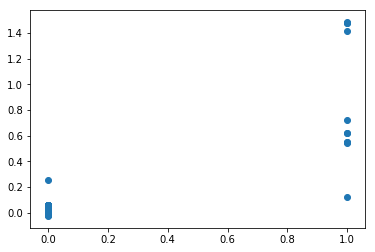

In [23]:
plt.scatter(Y_test, Y_pred)

In [24]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

0.0008597059514831268


In [25]:
accuracy=(1-(mse))
print(accuracy)

0.9991402940485169


# Applying Logistic Regression 

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

In [27]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('10kcc.csv')

# Show the contents
#print(df)

In [28]:
data = pd.read_csv('10kcc.csv')

In [29]:
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
y = data[target]

In [30]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [32]:
# Define the model
model = LogisticRegression()

# Define the splitter for splitting the data in a train set and a test set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(X, y):
    # Select the train and test data
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fit and predict!
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4981
          1       1.00      0.89      0.94        19

avg / total       1.00      1.00      1.00      5000



In [33]:
accuracy=(4981/5000)
print(accuracy)

0.9962


# Applying mlp and calculating accuracy

In [17]:
# Load required libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
import numpy as np

In [18]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('10kcc.csv')

# Show the contents
#print(df)

In [19]:
data = pd.read_csv('10kcc.csv')
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
y = data[target]

In [20]:
# Split the data into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
# Apply the scaler to the X training data
X_train_std = sc.transform(X_train)

# Apply the SAME scaler to the X test data
X_test_std = sc.transform(X_test)

In [23]:
clf = MLPClassifier(activation='logistic', alpha=1e-05, batch_size=6, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
clf.fit(X_train_std, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size=6, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [24]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred = clf.predict(X_test_std)

In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


In [27]:
clf.coefs_

[array([[ 2.49503232e-01, -4.21659424e-01, -2.91187941e-01,
         -2.47304546e-01, -3.71349709e-01,  6.07547534e-02,
          3.44793955e-02],
        [ 9.21838201e-02, -5.27995033e-01,  4.89333504e-01,
          1.02610977e-01,  3.00404321e-01, -1.43390284e-01,
         -1.20430070e-01],
        [-8.99494718e-01, -1.06931454e+00, -1.29741203e+00,
          1.23247533e-01, -1.79951693e-02, -9.47430145e-01,
         -9.46318303e-01],
        [ 1.02187224e+00,  1.93447946e+00,  3.14973445e+00,
          3.99457160e-01,  3.41523097e-01,  1.59419379e+00,
          1.60611563e+00],
        [-1.06131596e+00,  2.12968920e-01, -2.08975106e+00,
          4.68136146e-01, -5.63688994e-01, -1.36789323e+00,
         -1.14179727e+00],
        [ 3.53510961e-02,  1.84991541e-01,  8.56916649e-01,
         -8.30121767e-01,  2.35054160e-01,  8.76582449e-02,
          4.96161019e-01],
        [ 3.73005407e-01,  1.34041095e-01,  7.45189663e-01,
          1.28850550e-02,  4.31389112e-01,  8.10985440e-01

In [28]:
clf.classes_

array([0, 1], dtype=int64)

In [29]:
for trial in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    clf = MLPClassifier(activation='logistic', alpha=1e-05, batch_size=6, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, ), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    print(y_pred)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 1 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00
[0 0 0 ... 0 0 0]
Accuracy: 1.00


# Applying quadratic


#### Importing Required packages

In [30]:
from sklearn import datasets
import numpy as np
import time
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm

#### Generating the dataset

In [31]:
# Loading credit card dataset
data = pd.read_csv("10kcc.csv")
# Loading the features and storing them in X
X = data.iloc[:, 0:30]
# Loading the labels and storing them in y
y = data["Class"]

#### Splitting the data into train,test and validation sets.

In [32]:
## Train = 60 % , Test = 20 % , Train = 20 %
X_train, X_test, X_validation = np.split(X, [int(.6 * len(X)), int(.8 * len(X))])
Y_train, Y_test, Y_validation = np.split(y, [int(.6 * len(y)), int(.8 * len(y))])

### polynomial kernel degree=2 implies quadratic kernel

In [33]:
# Creating the svm object
clf = svm.SVC(kernel='poly', degree=2)
# Creating the time object
t0 = time.time()
t1 = time.time()
# Fitting the data into the model
clf.fit(X_train, Y_train)
# Calculating the training time
print("training time is ", round(time.time() - t0), "seconds")

training time is  2 seconds


#### Predicting the values

In [34]:
# Testing the data on the trained model
y_pred = clf.predict(X_test)
# Calculating the testing time
print("testingtime is ", round(time.time() - t1), "seconds")

testingtime is  2 seconds


#### Calculating the accuracy

In [35]:
accuracy_score(Y_test,y_pred)

0.9985

** Exercise 2:** Tabularize the accuracy of each classifier 

In [5]:
from prettytable import PrettyTable
t = PrettyTable(['Classifier', 'Accuracy'])

In [6]:
t.add_row(['Linear regression', 0.9991402940485169])

In [7]:
t.add_row(['Logistic regression', 0.9962])

In [8]:
t.add_row(['MLP', 1.00])

In [9]:
t.add_row(['Quadratic',0.9985])

In [11]:
print (t)

+---------------------+--------------------+
|      Classifier     |      Accuracy      |
+---------------------+--------------------+
|  Linear regression  | 0.9991402940485169 |
| Logistic regression |       0.9962       |
|         MLP         |        1.0         |
|      Quadratic      |       0.9985       |
+---------------------+--------------------+
